In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import sklearn
import matplotlib.pyplot as plt

In [2]:
super_bowl = pd.read_csv('super_bowls.csv')
tv = pd.read_csv('tv.csv')
halftime_musicians = pd.read_csv('halftime_musicians.csv')

In [4]:
display(super_bowl.head())

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


In [26]:
tv.head()
# tv[tv['super_bowl']<=1]

,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000


In [6]:
halftime_musicians.head()

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0


In [7]:
super_bowl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 18 columns):
date              52 non-null object
super_bowl        52 non-null int64
venue             52 non-null object
city              52 non-null object
state             52 non-null object
attendance        52 non-null int64
team_winner       52 non-null object
winning_pts       52 non-null int64
qb_winner_1       52 non-null object
qb_winner_2       2 non-null object
coach_winner      52 non-null object
team_loser        52 non-null object
losing_pts        52 non-null int64
qb_loser_1        52 non-null object
qb_loser_2        3 non-null object
coach_loser       52 non-null object
combined_pts      52 non-null int64
difference_pts    52 non-null int64
dtypes: int64(6), object(12)
memory usage: 7.4+ KB


In [8]:
tv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 9 columns):
super_bowl          53 non-null int64
network             53 non-null object
avg_us_viewers      53 non-null int64
total_us_viewers    15 non-null float64
rating_household    53 non-null float64
share_household     53 non-null int64
rating_18_49        15 non-null float64
share_18_49         6 non-null float64
ad_cost             53 non-null int64
dtypes: float64(4), int64(4), object(1)
memory usage: 3.8+ KB


In [9]:
halftime_musicians.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 3 columns):
super_bowl    134 non-null int64
musician      134 non-null object
num_songs     88 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ KB


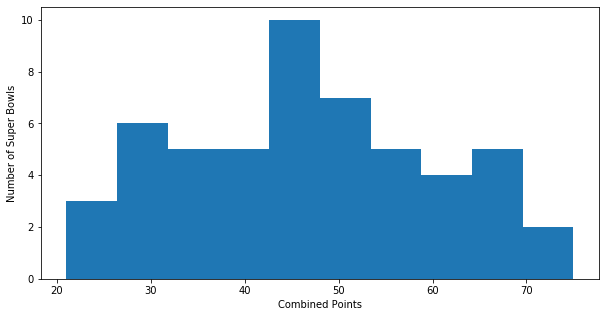

In [14]:
plt.figure(figsize=(10,5))
plt.hist(super_bowl['combined_pts'])
plt.xlabel('Combined Points')
plt.ylabel('Number of Super Bowls')
plt.show()

In [20]:
display(super_bowl[super_bowl['combined_pts']<25])

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
43,1975-01-12,9,Tulane Stadium,New Orleans,Louisiana,80997,Pittsburgh Steelers,16,Terry Bradshaw,NaN,Chuck Noll,Minnesota Vikings,6,Fran Tarkenton,NaN,Bud Grant,22,10
45,1973-01-14,7,Memorial Coliseum,Los Angeles,California,90182,Miami Dolphins,14,Bob Griese,NaN,Don Shula,Washington Redskins,7,Bill Kilmer,NaN,George Allen,21,7
49,1969-01-12,3,Orange Bowl,Miami,Florida,75389,New York Jets,16,Joe Namath,NaN,Weeb Ewbank,Baltimore Colts,7,Earl Morrall,Johnny Unitas,Don Shula,23,9


In [21]:
display(super_bowl[super_bowl['combined_pts']>=70])

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
23,1995-01-29,29,Joe Robbie Stadium,Miami Gardens,Florida,74107,San Francisco 49ers,49,Steve Young,NaN,George Seifert,San Diego Chargers,26,Stan Humphreys,NaN,Bobby Ross,75,23


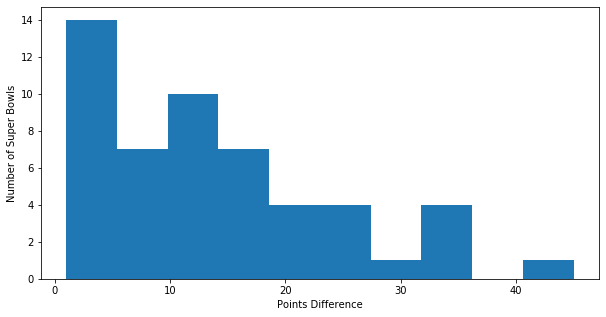

In [22]:
plt.figure(figsize=(10,5))
plt.hist(super_bowl['difference_pts'])
plt.xlabel('Points Difference')
plt.ylabel('Number of Super Bowls')
plt.show()

In [23]:
super_bowl[super_bowl['difference_pts']>=35]

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35
25,1993-01-31,27,Rose Bowl,Pasadena,California,98374,Dallas Cowboys,52,Troy Aikman,NaN,Jimmy Johnson,Buffalo Bills,17,Jim Kelly,Frank Reich,Marv Levy,69,35
28,1990-01-28,24,Louisiana Superdome,New Orleans,Louisiana,72919,San Francisco 49ers,55,Joe Montana,NaN,George Seifert,Denver Broncos,10,John Elway,NaN,Dan Reeves,65,45
32,1986-01-26,20,Louisiana Superdome,New Orleans,Louisiana,73818,Chicago Bears,46,Jim McMahon,NaN,Mike Ditka,New England Patriots,10,Tony Eason,Steve Grogan,Raymond Berry,56,36


In [24]:
super_bowl[super_bowl['difference_pts']==1]

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
27,1991-01-27,25,Tampa Stadium,Tampa,Florida,73813,New York Giants,20,Jeff Hostetler,NaN,Bill Parcells,Buffalo Bills,19,Jim Kelly,NaN,Marv Levy,39,1


### lost viewers
#### The vast majority of Super Bowls are close games.
#### Let's combine our game data and TV to see if this is a universal phenomenon

In [27]:
games_tv = pd.merge(tv[tv['super_bowl']>1], super_bowl, on='super_bowl')
games_tv.head()

,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost,date,...,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000,2018-02-04,...,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000,2017-02-05,...,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000,2016-02-07,...,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000,2015-02-01,...,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000,2014-02-02,...,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


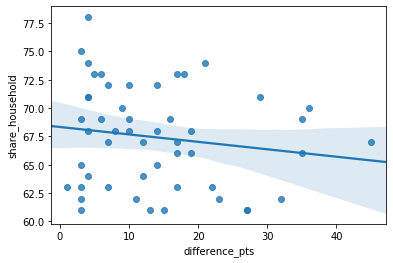

In [29]:
sb.regplot(x='difference_pts', y='share_household', data=games_tv)
plt.show()

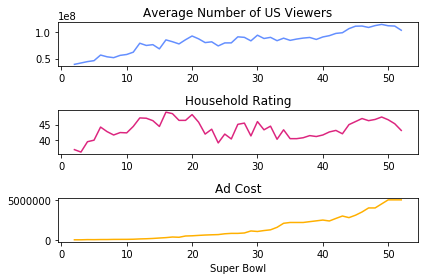

In [37]:
plt.subplot(3,1,1)
plt.plot(games_tv['super_bowl'], games_tv['avg_us_viewers'], color= '#648FFF')
plt.title('Average Number of US Viewers')

plt.subplot(3,1,2)
plt.plot(games_tv['super_bowl'], games_tv['rating_household'], color='#DC267F')
plt.title('Household Rating')

plt.subplot(3,1,3)
plt.plot(games_tv['super_bowl'], games_tv['ad_cost'], color='#FFB000')
plt.title('Ad Cost')

plt.xlabel('Super Bowl')
plt.tight_layout()
plt.show()

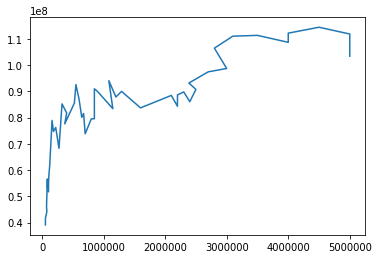

In [38]:
plt.plot(games_tv['ad_cost'], games_tv['avg_us_viewers'])
plt.show()

In [39]:
games_tv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 26 columns):
super_bowl          51 non-null int64
network             51 non-null object
avg_us_viewers      51 non-null int64
total_us_viewers    14 non-null float64
rating_household    51 non-null float64
share_household     51 non-null int64
rating_18_49        15 non-null float64
share_18_49         6 non-null float64
ad_cost             51 non-null int64
date                51 non-null object
venue               51 non-null object
city                51 non-null object
state               51 non-null object
attendance          51 non-null int64
team_winner         51 non-null object
winning_pts         51 non-null int64
qb_winner_1         51 non-null object
qb_winner_2         2 non-null object
coach_winner        51 non-null object
team_loser          51 non-null object
losing_pts          51 non-null int64
qb_loser_1          51 non-null object
qb_loser_2          3 non-null object
coach_

In [41]:
halftime_musicians.head()

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0


In [40]:
halftime_app = halftime_musicians.groupby('musician').count()['super_bowl'].reset_index().sort_values('super_bowl', ascending=False)
halftime_app

,musician,super_bowl
28,Grambling State University Tiger Marching Band,6
104,Up with People,4
1,Al Hirt,4
83,The Human Jukebox,3
76,Spirit of Troy,2
25,Florida A&M University Marching 100 Band,2
26,Gloria Estefan,2
102,University of Minnesota Marching Band,2
10,Bruno Mars,2
64,Pete Fountain,2


In [44]:
no_marching_band = halftime_musicians[~halftime_musicians['musician'].str.contains('Marching')]
no_marching_band = no_marching_band[~no_marching_band.musician.str.contains('Spirit')]
no_marching_band.head()

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0
5,50,Bruno Mars,3.0


In [45]:
no_marching_band

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0
5,50,Bruno Mars,3.0
6,50,Mark Ronson,1.0
8,50,Youth Orchestra Los Angeles,3.0
9,50,Gustavo Dudamel,3.0
10,49,Katy Perry,8.0
11,49,Lenny Kravitz,1.0


In [46]:
marching_band

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0
5,50,Bruno Mars,3.0
6,50,Mark Ronson,1.0
8,50,Youth Orchestra Los Angeles,3.0
9,50,Gustavo Dudamel,3.0
10,49,Katy Perry,8.0
11,49,Lenny Kravitz,1.0


In [47]:
super_bowl.head()

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


In [48]:
halftime_app.head()

,musician,super_bowl
28,Grambling State University Tiger Marching Band,6
104,Up with People,4
1,Al Hirt,4
83,The Human Jukebox,3
76,Spirit of Troy,2


In [50]:
halftime_app[halftime_app['super_bowl']>1]

,musician,super_bowl
28,Grambling State University Tiger Marching Band,6
104,Up with People,4
1,Al Hirt,4
83,The Human Jukebox,3
76,Spirit of Troy,2
25,Florida A&M University Marching 100 Band,2
26,Gloria Estefan,2
102,University of Minnesota Marching Band,2
10,Bruno Mars,2
64,Pete Fountain,2


In [62]:
halftime_app[halftime_app['super_bowl']==1]['super_bowl'].value_counts()

1    97
Name: super_bowl, dtype: int64

In [ ]:
plt.plot()